In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

In [21]:
#Import Requiered Modules
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData
from preprocessing import Preprocess
from plot_data import PlotData

In [4]:
#initialize classes
preprocess = Preprocess()
plot = PlotData()

In [5]:
loader = LoadData()

In [52]:
#load datasets
store_df = loader.read_csv('../data/store.csv')
train_df = loader.read_csv('../data/train.csv')
test_df = loader.read_csv('../data/test.csv')

C:\Users\Machine\Documents\Week3\Pharmaceutical-Sales-Prediction\scripts\load_data.py:45: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe containing data extracted from the json file


In [53]:
#Exploratory data overview of all each data set
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### There is no missing data in training set

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [56]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [57]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [58]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [59]:
#Size of each dataset
store_df.shape

(1115, 10)

In [60]:
train_df.shape

(1017209, 9)

In [61]:
test_df.shape

(41088, 8)

### Merging the store dataset with train and test dataset

In [62]:
train_store = preprocess.join_dataframes(train_df, store_df, 'Store', 'left')
test_store = preprocess.join_dataframes(test_df, store_df, 'Store', 'left')

In [63]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [64]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [67]:
#Changing the date column to datetime
train_store = preprocess.convert_to_datetime(train_store, 'Date')
test_store = preprocess.convert_to_datetime(test_store, 'Date')

In [68]:
#Extract relevant fields from Date column
train_store = preprocess.extract_fields_date(train_store, 'Date')
test_store = preprocess.extract_fields_date(test_store, 'Date')

C:\Users\Machine\Documents\Week3\Pharmaceutical-Sales-Prediction\scripts\preprocessing.py:131: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[date_column].dt.weekofyear
C:\Users\Machine\Documents\Week3\Pharmaceutical-Sales-Prediction\scripts\preprocessing.py:131: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[date_column].dt.weekofyear


In [69]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,4,31,0
1,1,3,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,30,3,31,0
2,1,2,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,29,2,31,0
3,1,1,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,28,1,31,0
4,1,0,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,27,0,31,1


In [70]:
#Using Date as an index
train_store.set_index('Date', inplace=True)
test_store.set_index('Date', inplace=True)

#### Saving the merged dataset

In [71]:
train_store.to_csv('../data/train_merged.csv', index=True)
test_store.to_csv('../data/test_merged.csv', index=True)

#### Reading the merged dataset

In [6]:
train_df = loader.read_csv('../data/train_merged.csv')
test_df = loader.read_csv('../data/test_merged.csv')

Getting Missing Data Overview

In [7]:
preprocess.get_missing_data_percentage(train_df)

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionOpenSinceMonth,323348,31.8
CompetitionOpenSinceYear,323348,31.8
CompetitionDistance,2642,0.3
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0


In [8]:
# Missing Data in the test data
preprocess.get_missing_data_percentage(test_df)

,Total,%
PromoInterval,17232,41.9
Promo2SinceYear,17232,41.9
Promo2SinceWeek,17232,41.9
CompetitionOpenSinceMonth,15216,37.0
CompetitionOpenSinceYear,15216,37.0
CompetitionDistance,96,0.2
Open,11,0.0
Promo2,0,0.0
weekofyear,0,0.0
weekday,0,0.0


##### handling all missing values in both test and train data

In [9]:
missing_df = train_df[['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance', 'Open']]
missing_df.head(10)

,PromoInterval,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance,Open
0,NaN,NaN,NaN,9.0,2008.0,1270.0,1
1,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2,NaN,NaN,NaN,9.0,2008.0,1270.0,1
3,NaN,NaN,NaN,9.0,2008.0,1270.0,1
4,NaN,NaN,NaN,9.0,2008.0,1270.0,1
5,NaN,NaN,NaN,9.0,2008.0,1270.0,0
6,NaN,NaN,NaN,9.0,2008.0,1270.0,1
7,NaN,NaN,NaN,9.0,2008.0,1270.0,1
8,NaN,NaN,NaN,9.0,2008.0,1270.0,1
9,NaN,NaN,NaN,9.0,2008.0,1270.0,1


fix missing values by median

In [10]:
miss_1 = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
train_df = preprocess.fill_missing_median(train_df, miss_1)
test_df = preprocess.fill_missing_median(test_df, miss_1)

In [11]:
# fill column 'Open' by 0

In [12]:
test_df = preprocess.fill_missing_with_zero(test_df, ['Open'])

fill PromoInterval column by mode values

In [13]:
train_df = preprocess.fill_missing_mode(train_df, ['PromoInterval'])
test_df = preprocess.fill_missing_mode(test_df, ['PromoInterval'])

### getting general overview of missing values

In [14]:
preprocess.get_missing_data_percentage(train_df)

,Total,%
Date,0,0.0
Store,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


In [15]:
preprocess.get_missing_data_percentage(test_df)

,Total,%
Date,0,0.0
CompetitionOpenSinceYear,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


### Handling outlier

In [16]:
train_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'weekday',
       'weekofyear', 'weekend'],
      dtype='object')

In [23]:
from df_outlier import DfOutlier

check for Sales and Customers columns, the others have fewer unique values

In [24]:
columns = ['Sales', 'Customers']
df_outliers = DfOutlier(train_df[columns].copy())
df_outliers.getOverview()

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
Sales,26694,2.62%,0.64146,3727.0,5744.0,7856.0
Customers,38095,3.75%,1.59865,405.0,609.0,837.0


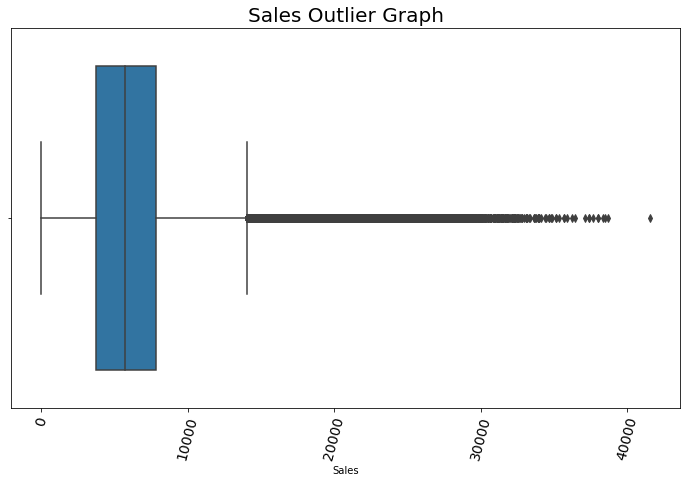

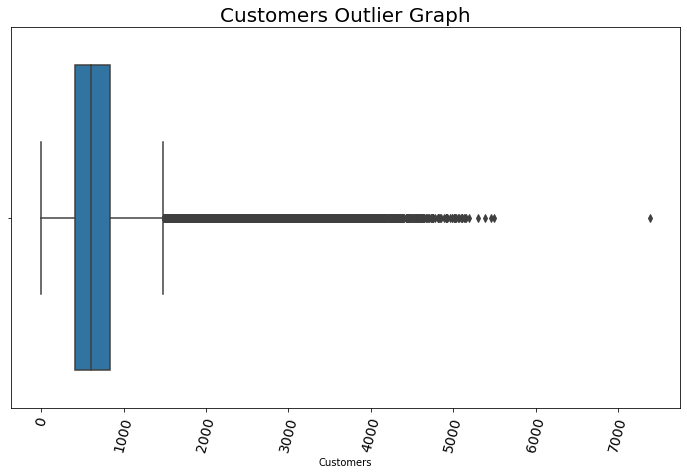

In [26]:
plot.plot_box(train_df, train_df['Sales'], "Sales Outlier Graph") 
plot.plot_box(train_df, train_df['Customers'], "Customers Outlier Graph")

### Handling Outlier

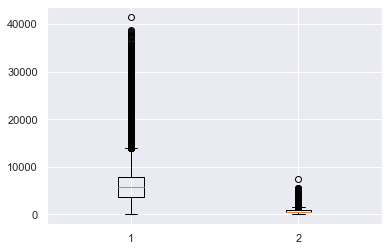

In [27]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

### Remove outliers of Sales and Customers columns

In [28]:
df = preprocess.replace_outliers_iqr(train_df, ['Sales', 'Customers'])

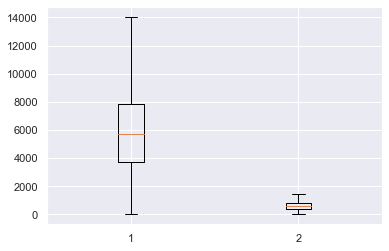

In [29]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

In [30]:
plot.plot_box(train_df, train_df['Sales'], "Sales Outlier Fixed Graph") 
plot.plot_box(train_df, train_df['Customers'], "Customers Outlier Graph")

AttributeError: 'PlotData' object has no attribute 'box_plot'